In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense

In [3]:
df=pd.read_csv('H:/ExcelR Data Science/datasets_BA/forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [5]:
df.drop(['month','day'],axis=1,inplace=True)

In [6]:
print('Shape of dataset before dropping duplicates:',df.shape)

Shape of dataset before dropping duplicates: (517, 29)


In [7]:
df.drop_duplicates(keep=False,inplace=True)

In [8]:
print('Shape of dataset after dropping duplicates:',df.shape)

Shape of dataset after dropping duplicates: (501, 29)


In [9]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [10]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,...,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,90.590619,109.578842,547.630339,9.025549,18.840918,44.217565,4.004990,0.019162,13.143174,0.161677,...,0.017964,0.039920,0.003992,0.063872,0.029940,0.103792,0.003992,0.001996,0.029940,0.343313
std,5.591709,63.546318,248.330243,4.611358,5.876331,16.414219,1.810424,0.296567,64.622131,0.368522,...,0.132954,0.195967,0.063119,0.244770,0.170592,0.305296,0.063119,0.044677,0.170592,0.475290
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,61.100000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.710000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,141.200000,713.000000,11.000000,22.800000,53.000000,5.400000,0.000000,6.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           501 non-null    float64
 1   DMC            501 non-null    float64
 2   DC             501 non-null    float64
 3   ISI            501 non-null    float64
 4   temp           501 non-null    float64
 5   RH             501 non-null    int64  
 6   wind           501 non-null    float64
 7   rain           501 non-null    float64
 8   area           501 non-null    float64
 9   dayfri         501 non-null    int64  
 10  daymon         501 non-null    int64  
 11  daysat         501 non-null    int64  
 12  daysun         501 non-null    int64  
 13  daythu         501 non-null    int64  
 14  daytue         501 non-null    int64  
 15  daywed         501 non-null    int64  
 16  monthapr       501 non-null    int64  
 17  monthaug       501 non-null    int64  
 18  monthdec  

In [12]:
# Label Encoding size_category column

from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['size_category']=le.fit_transform(df['size_category'])
print(le.classes_)

['large' 'small']


In [13]:
df['size_category'].dtypes

dtype('int32')

In [14]:
df['size_category'].value_counts()

1    364
0    137
Name: size_category, dtype: int64

In [15]:
## Splitting into X and Y
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [16]:
# Splitting into training and testing set

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)


### Standardizing continuous columns using Column Transformer

In [17]:
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

t=[('num',StandardScaler(),['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'])]
transformer=ColumnTransformer(transformers=t,remainder='passthrough')

# fit training data
transformer.fit(X_train)

# transform training data
X_train = transformer.transform(X_train)

# transform the test data
X_test = transformer.transform(X_test)


In [18]:
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (350, 28)
Shape of testing data (151, 28)


### Building Neural Network base model

In [19]:
model = Sequential()
model.add(Dense(30, input_dim=28,kernel_initializer='uniform', activation='relu'))
model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))



In [20]:
import pydot
import keras
from keras.utils.vis_utils import plot_model
keras.utils.vis_utils.pydot = pydot

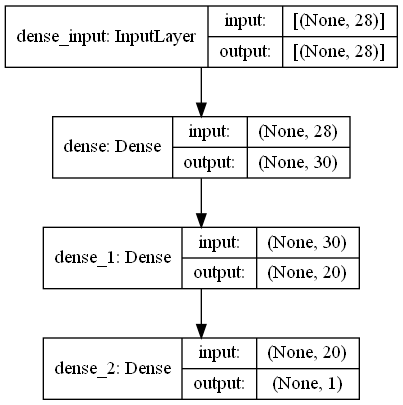

In [21]:
# Visualizing the neural network
plot_model(model,to_file='model_plot.png',show_shapes=True, show_layer_names=True)

In [22]:
# Summary of neural network
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                870       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 1,511
Trainable params: 1,511
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
# Assigning weights as it is an imbalanced dataset
weights={0:1,1:1}

In [25]:
# Training and evaluating the model
history=model.fit(X_train, Y_train, validation_data=(X_test,Y_test),class_weight=weights, epochs =100, batch_size=10)

Epoch 1/100
35/35 [==============================] - 2s 31ms/step - loss: 0.6907 - accuracy: 0.6743 - val_loss: 0.6784 - val_accuracy: 0.7483
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.7019 - val_loss: 0.6280 - val_accuracy: 0.7483
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6030 - accuracy: 0.7571 - val_loss: 0.5511 - val_accuracy: 0.7483
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.6915 - val_loss: 0.5212 - val_accuracy: 0.7483
Epoch 5/100
35/35 [==============================] - 0s 1ms/step - loss: 0.5344 - accuracy: 0.7444 - val_loss: 0.5014 - val_accuracy: 0.7682
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.7710 - val_loss: 0.4826 - val_accuracy: 0.7947
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.7577 - val_loss: 0.4555 - val_accuracy: 0.8278
Epoch 8/100


In [26]:
# evaluate the model
_,train_accuracy = model.evaluate(X_train,Y_train, verbose=0)
_,test_accuracy = model.evaluate(X_test, Y_test, verbose=0)

print('Training set accuracy: %.3f, Testing set accuracy: %.3f' % (train_accuracy, test_accuracy))

Training set accuracy: 1.000, Testing set accuracy: 0.954


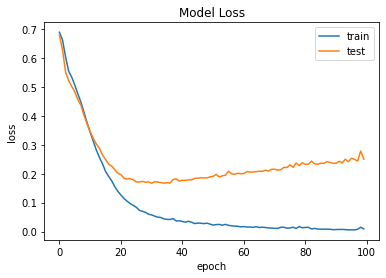

In [27]:
# plot loss during training
plt.title('Model Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend()
plt.show()

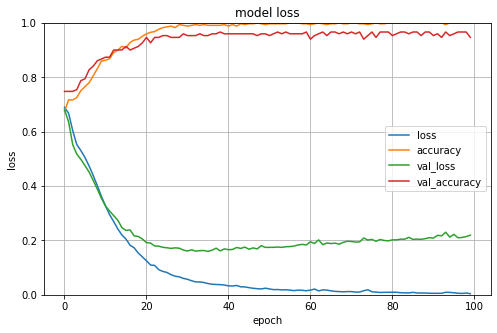

In [28]:
## Plotting the learning curves

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [29]:
# Making predictions

y_pred=model.predict_classes(X_test);

H:\anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [30]:
# Classification report

from sklearn.metrics import classification_report

names=['0-large fire','1-small fire']
print(classification_report(Y_test, y_pred,target_names=names))

              precision    recall  f1-score   support

0-large fire       0.92      0.87      0.89        38
1-small fire       0.96      0.97      0.96       113

    accuracy                           0.95       151
   macro avg       0.94      0.92      0.93       151
weighted avg       0.95      0.95      0.95       151



## Hyperparameter Tuning using RandomizedSearchCV

In [31]:
from sklearn.model_selection import RandomizedSearchCV, KFold

In [32]:
from keras.optimizers import Adam

In [33]:
from keras.wrappers.scikit_learn import KerasClassifier


In [34]:
# Building a keras classification model

def create_keras_model(learning_rate,activation_function,init,neuron1,neuron2):
    
    model = Sequential()
    
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = init,activation = activation_function))
 
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))

    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model



In [35]:
# Wrapping the keras model in a object

keras_clf = KerasClassifier(build_fn = create_keras_model,verbose = 0)

In [43]:
# Define the search parameters

batch_size = [10,20,30,40,50]
epochs = [25,50,100]
learning_rate = [0.001,0.01,0.1]

activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [10,20,30]
neuron2 = [2,4,6,8]


# Create a dictionary of the parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)


# Build and fit the RandomizedSearchCV

random_search = RandomizedSearchCV(estimator = keras_clf,param_distributions = param_grids,cv = 5,n_jobs=-1,verbose = 10,
                                   random_state=40)
random_result = random_search.fit(X_train,Y_train)




Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   27.7s finished


In [44]:
# Summarize the results
print('Best score:',random_result.best_score_)
print('Best parameters:',random_result.best_params_)


Best score: 0.9599999904632568
Best parameters: {'neuron2': 8, 'neuron1': 20, 'learning_rate': 0.01, 'init': 'uniform', 'epochs': 50, 'batch_size': 40, 'activation_function': 'linear'}


In [45]:
## storing the best parameters in a variable
## fitting the model with best parameters

d1= random_result.best_params_

keras_tuned=create_keras_model(learning_rate=d1['learning_rate'],activation_function=d1['activation_function'],init=d1['init'],
                                                                                       neuron1=d1['neuron1'],neuron2=d1['neuron2'])

# Training and evaluating the model
history2=keras_tuned.fit(X_train, Y_train, validation_data=(X_test,Y_test),class_weight=weights,
                         epochs =d1['epochs'], batch_size=d1['batch_size'])

Epoch 1/50
9/9 [==============================] - 1s 23ms/step - loss: 0.6610 - accuracy: 0.6821 - val_loss: 0.5258 - val_accuracy: 0.7483
Epoch 2/50
9/9 [==============================] - 0s 5ms/step - loss: 0.5567 - accuracy: 0.7310 - val_loss: 0.5047 - val_accuracy: 0.7550
Epoch 3/50
9/9 [==============================] - 0s 5ms/step - loss: 0.5184 - accuracy: 0.7519 - val_loss: 0.4828 - val_accuracy: 0.8212
Epoch 4/50
9/9 [==============================] - 0s 6ms/step - loss: 0.4621 - accuracy: 0.7966 - val_loss: 0.4076 - val_accuracy: 0.8411
Epoch 5/50
9/9 [==============================] - 0s 6ms/step - loss: 0.3919 - accuracy: 0.8411 - val_loss: 0.3631 - val_accuracy: 0.8742
Epoch 6/50
9/9 [==============================] - 0s 6ms/step - loss: 0.3316 - accuracy: 0.8713 - val_loss: 0.3006 - val_accuracy: 0.8742
Epoch 7/50
9/9 [==============================] - 0s 6ms/step - loss: 0.2934 - accuracy: 0.8740 - val_loss: 0.2877 - val_accuracy: 0.9007
Epoch 8/50
9/9 [=================

In [46]:
# evaluate the model
_,train_accuracy_tuned = keras_tuned.evaluate(X_train,Y_train, verbose=0)
_,test_accuracy_tuned = keras_tuned.evaluate(X_test, Y_test, verbose=0)

print('Training set accuracy: %.3f, Testing set accuracy: %.3f' % (train_accuracy_tuned, test_accuracy_tuned))

Training set accuracy: 0.994, Testing set accuracy: 0.954


In [47]:
# Making predictions

y_pred_tuned=keras_tuned.predict_classes(X_test);

H:\anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


### Classification report of tuned model

In [48]:
from sklearn.metrics import classification_report

names=['0-large fire','1-small fire']
print(classification_report(Y_test, y_pred_tuned,target_names=names))

              precision    recall  f1-score   support

0-large fire       0.88      0.95      0.91        38
1-small fire       0.98      0.96      0.97       113

    accuracy                           0.95       151
   macro avg       0.93      0.95      0.94       151
weighted avg       0.96      0.95      0.95       151



### Comparing base model and tuned model

In [49]:
result=pd.DataFrame({'models':['base model','tuned model'],'train accuracy':[train_accuracy,train_accuracy_tuned],
                     'test accuracy':[test_accuracy,test_accuracy_tuned]})
result

,models,train accuracy,test accuracy
0,base model,1.000000,0.947020
1,tuned model,0.994286,0.953642


We can see that hypertuning parameters using RandomizedSearchCV has improved the test set accuracy and also minimized the difference between accuracy of train and test set thus reducing overfitting.